In [21]:
import numpy as np
import pandas as pd
import plotly.express as px

In [22]:
data=pd.read_csv("/Users/javanmardi/Sciebo_Xray_PBOX/paper/output/predicted_dis_bone_ages_2_graders.csv", sep=',', header=0)

In [23]:
data

,Unnamed: 0,image_ID,sex,disorder,y_hat,chronological_age,clinical_ba,AK1,KM1,bone_age,ba_two_raters,first_rating,second_rating
0,0,uts_magd_00000.png,F,UTS,182.167860,182,NaN,NaN,180.0,180.0,NaN,180.0,180.0
1,1,uts_magd_00001.png,F,UTS,149.274546,151,NaN,NaN,150.0,150.0,NaN,150.0,150.0
2,2,uts_magd_00002.png,F,UTS,166.508785,163,168.0,NaN,NaN,168.0,NaN,168.0,NaN
3,3,uts_magd_00003.png,F,UTS,171.412118,179,NaN,NaN,174.0,174.0,NaN,174.0,174.0
4,4,uts_magd_00004.png,F,UTS,171.827975,176,NaN,NaN,174.0,174.0,NaN,174.0,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,946,uts_leip_00507.png,M,Silver_Russel,117.685485,114,129.0,NaN,120.0,124.5,124.5,129.0,120.0
947,947,uts_leip_00508.png,M,Noonan,175.814535,200,186.0,NaN,168.0,177.0,177.0,186.0,168.0
948,948,uts_leip_00509.png,F,UTS,136.552738,155,NaN,NaN,120.0,120.0,NaN,120.0,120.0
949,949,uts_leip_00510.png,F,UTS,149.673117,146,144.0,NaN,150.0,147.0,147.0,144.0,150.0


In [24]:
data.keys()

Index(['Unnamed: 0', 'image_ID', 'sex', 'disorder', 'y_hat',
       'chronological_age', 'clinical_ba', 'AK1', 'KM1', 'bone_age',
       'ba_two_raters', 'first_rating', 'second_rating'],
      dtype='object')

In [25]:
two_BA=data[pd.notna(data['ba_two_raters'])]

In [26]:
two_BA

,Unnamed: 0,image_ID,sex,disorder,y_hat,chronological_age,clinical_ba,AK1,KM1,bone_age,ba_two_raters,first_rating,second_rating
39,39,hych_magd_00000.png,M,HyCh,210.994274,199,NaN,192.0,204.0,198.0,198.0,204.0,192.0
40,40,hych_magd_00001.png,M,HyCh,183.226151,184,186.0,180.0,NaN,183.0,183.0,186.0,180.0
41,41,hych_magd_00002.png,M,HyCh,171.880363,175,168.0,162.0,NaN,165.0,165.0,168.0,162.0
42,42,hych_magd_00003.png,M,HyCh,158.899396,164,156.0,156.0,NaN,156.0,156.0,156.0,156.0
43,43,hych_magd_00004.png,M,HyCh,146.293938,140,132.0,114.0,NaN,123.0,123.0,132.0,114.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,944,uts_leip_00505.png,F,UTS,127.908481,145,132.0,NaN,120.0,126.0,126.0,132.0,120.0
946,946,uts_leip_00507.png,M,Silver_Russel,117.685485,114,129.0,NaN,120.0,124.5,124.5,129.0,120.0
947,947,uts_leip_00508.png,M,Noonan,175.814535,200,186.0,NaN,168.0,177.0,177.0,186.0,168.0
949,949,uts_leip_00510.png,F,UTS,149.673117,146,144.0,NaN,150.0,147.0,147.0,144.0,150.0


In [27]:
difference=two_BA['y_hat']-two_BA['ba_two_raters']
print(np.std(difference))
print(np.mean(difference))
print(1.96*np.std(difference))

7.544351933790845
1.4001220471259126
14.786929790230056


In [28]:
two_BA_female=two_BA.loc[two_BA['sex']=='F']
two_BA_male=two_BA.loc[two_BA['sex']=='M']

difference_male=two_BA_male['y_hat']-two_BA_male['ba_two_raters']
difference_female=two_BA_female['y_hat']-two_BA_female['ba_two_raters']

print(np.mean((difference_male)))
print(np.mean((difference_female)))

3.062967936800713
-0.06657044001352509


# Plotly

HyCh
PsPHT
None
Silver_Russel
ACh
IUGR
SHOX_mutation
Noonan
UTS


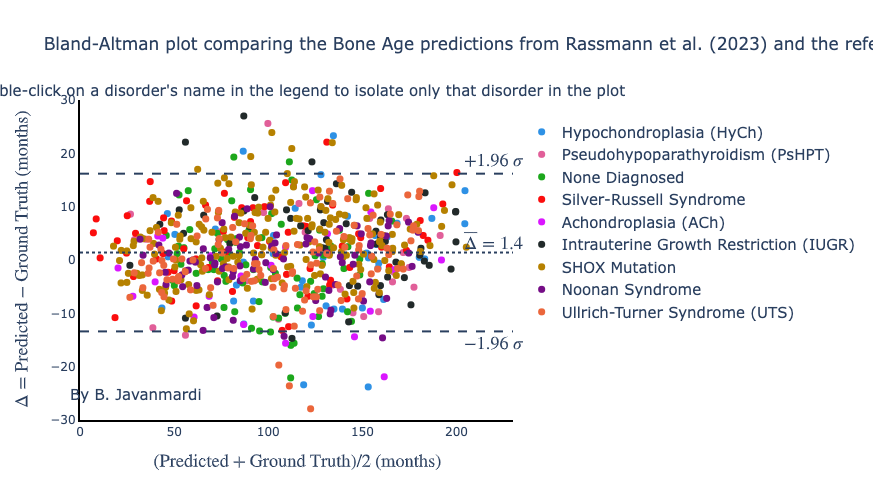

In [44]:
import plotly.graph_objects as go
labels={"sex": "Sex"}

# for PDF output
category_names=['HyCh', 'PsHPT', 'None Diagnosed', 'SRS', 'ACh', 'IUGR', 'SHOX Mutation', 'Noonan','UTS']

#for HTML output:
category_names=['Hypochondroplasia (HyCh)', 'Pseudohypoparathyroidism (PsHPT)', 'None Diagnosed', 'Silver-Russell Syndrome', 'Achondroplasia (ACh)', 'Intrauterine Growth Restriction (IUGR)', 'SHOX Mutation', 'Noonan Syndrome', 'Ullrich-Turner Syndrome (UTS)']

# for PDF output width=1200, height=350 and comment the title
# for HTML output 
fig = px.scatter(two_BA, x=round((two_BA['ba_two_raters']+two_BA['y_hat'])/2,1),y=round(difference,1), hover_data=['disorder', 'sex'], color="disorder", color_discrete_sequence=px.colors.qualitative.Dark24, 
                  width=1300, height=500, labels=None, opacity=1,title='Bland-Altman plot comparing the Bone Age predictions from Rassmann et al. (2023) and the reference gradings (ground truth)')#, symbol='sex', symbol_sequence=['diamond', 'circle'])

fig.update_traces(marker={'size': 7})


for i in range(len(category_names)):
    print(fig.data[i].name)
    fig.data[i].name=category_names[i]

fig.update_layout(legend_title = "  ")    

# conf interval
fig.add_shape(type="line",
              x0=0, 
              y0=1.96*np.std(difference)+np.mean(difference), 
              x1=260, 
              y1=1.96*np.std(difference)+np.mean(difference), line_dash="dash")

fig.add_shape(type="line",
              x0=0, 
              y0=np.mean(difference)-1.96*np.std(difference), 
              x1=260, 
              y1=np.mean(difference)-1.96*np.std(difference), line_dash="dash")




fig.add_shape(type="line",
              x0=0, 
              y0=np.mean(difference), 
              x1=260, 
              y1=np.mean(difference), line_dash="dot")



fig.update_layout(yaxis_range=[-30,30],xaxis_range=[0,230])

fig.update_xaxes(title_text='$(\mathrm{Predicted} + \mathrm{Ground} \: \mathrm{Truth})/2 \: \mathrm{(months)}$')
ytitle='$\Delta=\mathrm{Predicted} - \mathrm{Ground} \: \mathrm{Truth} \: \mathrm{(months)}$'
fig.update_yaxes(title_text=ytitle)

fig.update_layout(
#     margin=dict(l=0,r=0,b=0,t=0),   # keep for PDF output, comment for HTML output
    plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')

# fig.update_layout(legend=dict(
#     orientation="h",
#     yanchor="bottom",
#     y=1.02,
#     xanchor="right",
#     x=0.8
# ), legend_font_size=13)

fig.update_layout(legend_font_size=15)

fig.add_annotation(x=220, y=2.5*np.std(difference),
            text="$+1.96\:\sigma$",
            showarrow=False,
            yshift=1)

fig.add_annotation(x=220, y=-2.05*np.std(difference),
            text="$-1.96\:\sigma$",
            showarrow=False,
            yshift=1)

fig.add_annotation(x=220, y=np.mean(difference)+1,
            text="$\overline{\Delta}=1.4$",
            showarrow=False,
            yshift=10)

# only for HTML output:
fig.add_annotation(x=115, y=30,
            text="Double-click on a disorder's name in the legend to isolate only that disorder in the plot",
            showarrow=False,
            yshift=10)

# only for HTML output:
fig.add_annotation(x=30, y=-27,
            text="By B. Javanmardi",
            showarrow=False,
            yshift=10)


fig.update_annotations(font_size=15)

fig.update_yaxes(title_font=dict(size=15),tickfont_size=12)
fig.update_xaxes(title_font=dict(size=15),tickfont_size=12)

fig.update_layout(modebar_remove=['lasso2d','select2d'])

# fig.write_image("Bland_Altman.pdf", scale=3.0)
fig.write_html("Bland_Altman.html",include_mathjax = 'cdn')

fig.show()

# mono color

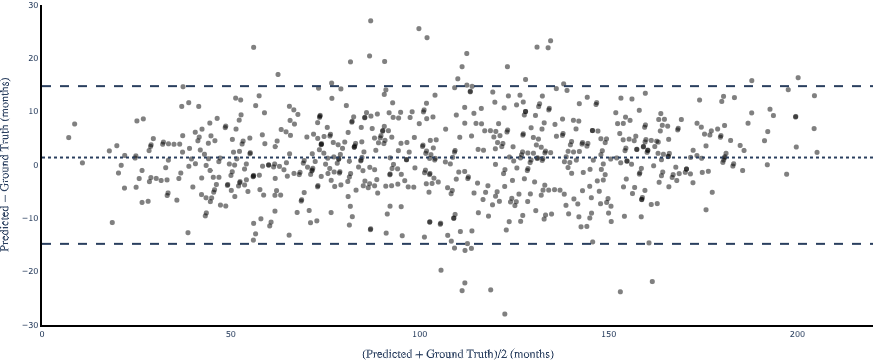

In [30]:
import plotly.graph_objects as go
labels={"sex": "Sex"}


fig = px.scatter(two_BA, x=(two_BA['ba_two_raters']+two_BA['y_hat'])/2,y=difference, 
                  width=450, height=205, labels=None, opacity=0.5, color_discrete_sequence=['black'])

fig.update_traces(marker={'size': 5})



fig.update_layout(legend_title = "  ")    

# conf interval
fig.add_shape(type="line",
              x0=0, 
              y0=1.96*np.std(difference), 
              x1=260, 
              y1=1.96*np.std(difference), line_dash="dash")

fig.add_shape(type="line",
              x0=0, 
              y0=-1.96*np.std(difference), 
              x1=260, 
              y1=-1.96*np.std(difference), line_dash="dash")




fig.add_shape(type="line",
              x0=0, 
              y0=np.mean(difference), 
              x1=260, 
              y1=np.mean(difference), line_dash="dot")



fig.update_layout(yaxis_range=[-30,30],xaxis_range=[0,220])

fig.update_xaxes(title_text='$(\mathrm{Predicted} + \mathrm{Ground} \: \mathrm{Truth})/2 \: \mathrm{(months)}$')
ytitle='$\mathrm{Predicted} - \mathrm{Ground} \: \mathrm{Truth} \: \mathrm{(months)}$'
fig.update_yaxes(title_text=ytitle)

fig.update_layout(
    margin=dict(l=0,r=0,b=0,t=0),
    plot_bgcolor='rgba(0,0,0,0)')
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')


# fig.add_annotation(x=220, y=2.2*np.std(difference),
#             text="$+1.96\:\sigma$",
#             showarrow=False,
#             yshift=1)

# fig.add_annotation(x=220, y=-2.2*np.std(difference),
#             text="$-1.96\:\sigma$",
#             showarrow=False,
#             yshift=1)

# fig.add_annotation(x=220, y=np.mean(difference)+1,
#             text="$\overline{\Delta}=1.4$",
#             showarrow=False,
#             yshift=10)

# fig.update_annotations(font_size=50)

fig.update_yaxes(title_font=dict(size=10),tickfont_size=8)
fig.update_xaxes(title_font=dict(size=10),tickfont_size=8)

fig.write_image("Bland_Altman_monocolor.pdf", scale=1.0)

fig.show()